In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
genes=['gene' +str(i) for i in range(1,101)]

In [3]:
genes

['gene1',
 'gene2',
 'gene3',
 'gene4',
 'gene5',
 'gene6',
 'gene7',
 'gene8',
 'gene9',
 'gene10',
 'gene11',
 'gene12',
 'gene13',
 'gene14',
 'gene15',
 'gene16',
 'gene17',
 'gene18',
 'gene19',
 'gene20',
 'gene21',
 'gene22',
 'gene23',
 'gene24',
 'gene25',
 'gene26',
 'gene27',
 'gene28',
 'gene29',
 'gene30',
 'gene31',
 'gene32',
 'gene33',
 'gene34',
 'gene35',
 'gene36',
 'gene37',
 'gene38',
 'gene39',
 'gene40',
 'gene41',
 'gene42',
 'gene43',
 'gene44',
 'gene45',
 'gene46',
 'gene47',
 'gene48',
 'gene49',
 'gene50',
 'gene51',
 'gene52',
 'gene53',
 'gene54',
 'gene55',
 'gene56',
 'gene57',
 'gene58',
 'gene59',
 'gene60',
 'gene61',
 'gene62',
 'gene63',
 'gene64',
 'gene65',
 'gene66',
 'gene67',
 'gene68',
 'gene69',
 'gene70',
 'gene71',
 'gene72',
 'gene73',
 'gene74',
 'gene75',
 'gene76',
 'gene77',
 'gene78',
 'gene79',
 'gene80',
 'gene81',
 'gene82',
 'gene83',
 'gene84',
 'gene85',
 'gene86',
 'gene87',
 'gene88',
 'gene89',
 'gene90',
 'gene91',
 'gene92

In [4]:
wt=['wt' +str(i) for i in range(1,6)]

In [5]:
wt

['wt1', 'wt2', 'wt3', 'wt4', 'wt5']

In [6]:
ko=['ko' +str(i) for i in range(1,6)]

In [7]:
ko

['ko1', 'ko2', 'ko3', 'ko4', 'ko5']

In [8]:
data=pd.DataFrame(columns=[*wt,*ko],index=genes)

In [9]:
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
gene96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
for gene in data.index:
    data.loc[gene,'wt1' : 'wt5']=np.random.poisson(lam=rd.randrange(10,1000),size=5)
    data.loc[gene,'ko1' : 'ko5']=np.random.poisson(lam=rd.randrange(10,1000),size=5)

In [15]:
data.head(100)

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,478,471,455,470,452,413,463,414,451,455
gene2,902,882,894,897,912,108,102,120,136,136
gene3,55,47,49,50,60,828,834,796,864,753
gene4,398,387,403,370,371,80,62,95,92,88
gene5,830,874,904,879,910,286,331,300,311,292
...,...,...,...,...,...,...,...,...,...,...
gene96,267,322,264,273,257,427,425,418,417,428
gene97,760,796,773,852,825,878,896,912,986,886
gene98,405,443,417,447,457,917,872,882,918,878
gene99,79,99,88,76,91,905,893,953,901,945


In [16]:
data.shape

(100, 10)

# Prerocessing of Data

In [17]:
scaled_data=preprocessing.scale(data.T)

# Creating PCA Model

In [18]:
pca=PCA()

In [19]:
pca.fit(scaled_data)

PCA()

In [22]:
pcs_data=pca.transform(scaled_data)

In [23]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)

In [25]:
labels=['PC' +str(x) for x in range(1,len(per_var)+1)]

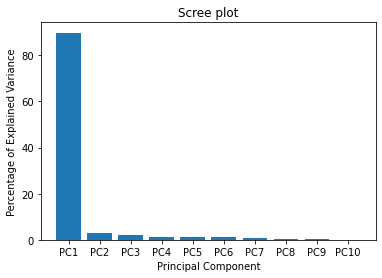

In [26]:
plt.bar(x=range(1,len(per_var)+1),height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree plot')
plt.show()